**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
TXT_FOLDER = "encode_rnaseq"

## Import data

In [3]:
txt_folder = TXT_FOLDER
txt_fdiry  = file.path(FD_DAT, "external", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

checksum_md5sum.txt 
checksum_results.txt 
K562.hg38.ENCSR615EEK.ENCFF421TJX.RNAseq_total.tsv 
K562.hg38.ENCSR615EEK.ENCFF585HTZ.RNAseq_total.strand_pos.bw 
K562.hg38.ENCSR615EEK.ENCFF876JOV.RNAseq_total.strand_neg.bw 
run_download_files.log.txt 
run_download_files.sh 
run_download.log.txt 
tmp 


In [4]:
### set file path
txt_folder = TXT_FOLDER
txt_fdiry  = file.path(FD_DAT, "external", txt_folder)
txt_fname  = "K562.hg38.ENCSR615EEK.ENCFF421TJX.RNAseq_total.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### show and assign
dat_rnaseq_import = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 59526    17


gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
10904,10904,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12954,12954,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12956,12956,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12958,12958,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12960,12960,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12962,12962,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Explore data

Show distribution of gene expression

In [5]:
dat = dat_rnaseq_import
summary(dat$TPM)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      0.00      0.00     16.80      0.54 152445.71 

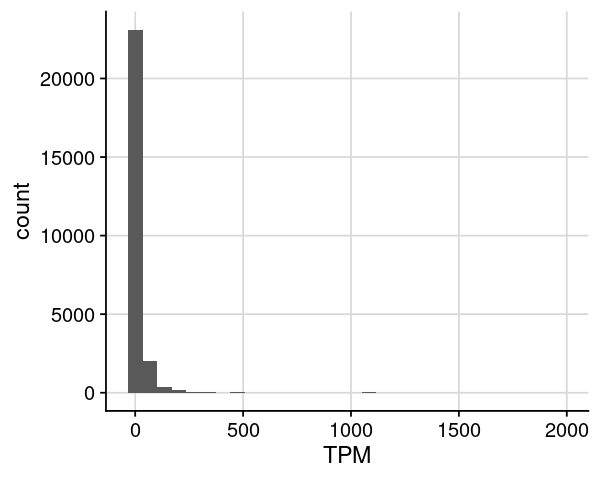

In [6]:
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM > 0, TPM <= 2000)
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

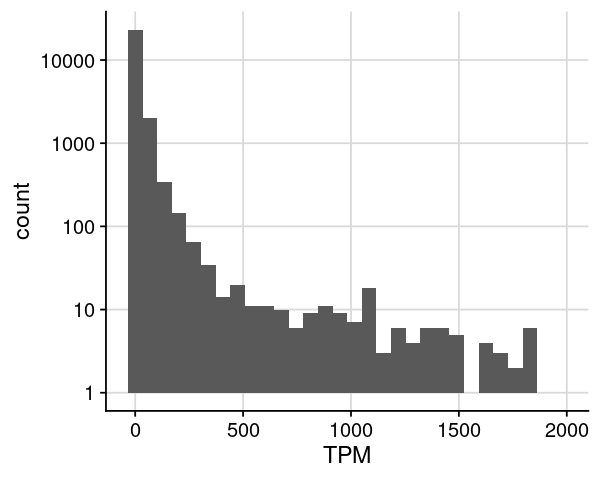

In [7]:
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM > 0, TPM <= 2000)
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    scale_y_log10() +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

## Summary

**Number of genes with TPM as zero**

In [8]:
### init
dat = dat_rnaseq_import

### Total
tmp  = dat
num1 = length(unique(tmp$gene_id))

### TPM == 0
tmp = dat %>% dplyr::filter(TPM == 0)
num2 = length(unique(tmp$gene_id))

### TMP > 0
tmp = dat %>% dplyr::filter(TPM > 0)
num3 = length(unique(tmp$gene_id))

### TMP > 1
tmp = dat %>% dplyr::filter(TPM > 1)
num4 = length(unique(tmp$gene_id))

### show
cat("",
    "#{Gene | Total } =", num1, "\n",
    "#{Gene | TPM==0} =", num2, "\n",
    "#{Gene | TPM >0} =", num3, "\n",
    "#{Gene | TPM >1} =", num4, "\n"
)

 #{Gene | Total } = 59526 
 #{Gene | TPM==0} = 33608 
 #{Gene | TPM >0} = 25918 
 #{Gene | TPM >1} = 13184 


## Save results

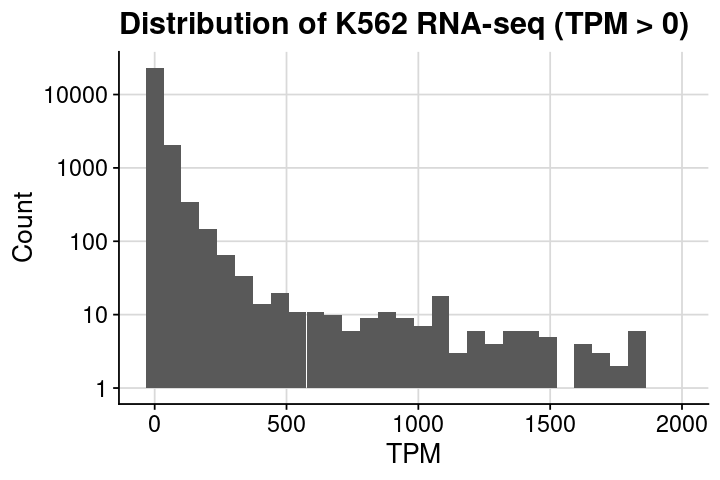

In [9]:
### prepare dataframe
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM > 0, TPM <= 2000)

### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

### create plot
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    scale_y_log10() +
    theme_cowplot() +
    theme_text +
    background_grid() +
    labs(x = "TPM", y = "Count", 
         title = "Distribution of K562 RNA-seq (TPM > 0)")

### assign and show
gpt_export = gpt
options(repr.plot.height=4, repr.plot.width=6)
print(gpt)

In [10]:
txt_fdiry = "./"
txt_fname = "fig.rnaseq.distribution.tpm.nonzero.below2k.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 4, width = 6, units = "in")

In [11]:
txt_fdiry = "./"
txt_fname = "fig.rnaseq.distribution.tpm.nonzero.below2k.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 4, width = 6, units = "in")